In [2]:
import sys, os, pathlib
#setting the path to folder with modules
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[1] / 'python'))
from Load_Datasets import *

In [3]:
FileAddress_movies ="../../Datasets/tmdb_5000_movies.csv"
FileAddress_credits="../../Datasets/tmdb_5000_credits.csv"

In [4]:
#Loading information about movies
Movies,Credentials  = Load_Datasets(FileAddress_movies,FileAddress_credits)

Drops = ['homepage','status','id']
for drop in Drops:
    Movies = Movies.drop(drop, 1)
        
Movies.to_csv("../../Datasets/Transformed.csv")
#print(Movies.dtypes)
#read arrays from string using string.split(",")

In [5]:
Movies

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,genres_id,keywords_id,production_companies_id,actors,actors_id,actor_gender,crew_names,crew_names_id,crew_jobs,crew_departments
title,,,,,,,,,,,,,,,,,,,,,
#Horror,1500000,"Drama,Mystery,Horror,Thriller",,de,#Horror,"Inspired by actual events, a group of 12 year ...",2.815228,"AST Studios,Lowland Pictures",United States of America,2015-11-20,...,"18,9648,27,53",,"75277,75278","Taryn Manning,Natasha Lyonne,Chloë Sevigny,Bal...","343,10871,2838,9296,16327,210573,180425,110233...","1,1,1,2,2,1,0,0,1","Tara Subkoff,Tara Subkoff,Tara Subkoff,Jason L...","61111,61111,61111,1382445,1382446,1382448","Screenplay,Director,Producer,Producer,Producer...","Writing,Directing,Production,Production,Produc..."
(500) Days of Summer,7500000,"Comedy,Drama,Romance","date,sex,jealousy,fight,architect,gallery,inte...",en,(500) Days of Summer,"Tom (Joseph Gordon-Levitt), greeting-card writ...",45.610993,"Fox Searchlight Pictures,Watermark,Dune Entert...",United States of America,2009-07-17,...,"35,18,10749","248,572,931,1721,2301,2861,4434,5923,8508,9673...","43,4364,6332","Joseph Gordon-Levitt,Zooey Deschanel,Chloë Gra...","24045,11664,56734,5375,5661,9048,56358,96624,9...","2,1,1,2,2,2,1,1,1,2,2,1,1,0,2,1,0,0,1,0,0,2,0","Mychael Danna,Hope Hanafin,Steven J. Wolfe,Mas...","5359,16469,22433,52446,52449,53648,54050,66519...","Original Music Composer,Costume Design,Produce...","Sound,Costume & Make-Up,Production,Production,..."
10 Cloverfield Lane,15000000,"Thriller,Science Fiction,Drama","kidnapping,bunker,paranoia,basement,survivalis...",en,10 Cloverfield Lane,"After a car accident, Michelle awakens to find...",53.698683,"Paramount Pictures,Bad Robot,Spectrum Effects",United States of America,2016-03-10,...,"53,878,18","1930,2321,2340,9866,10833,12332,13063,15381","4,11461,78177","Mary Elizabeth Winstead,John Goodman,John Gall...","17628,1230,17487,51329,60881,1354257,8269,1413...","1,2,2,2,2,0,1,0,2,0","Monika Mikkelsen,J.J. Abrams,Matthew W. Mungle...","2325,15344,23788,69506,59811,66491,92336,13649...","Casting,Producer,Makeup Effects,Director of Ph...","Production,Production,Crew,Camera,Sound,Art,Cr..."
10 Days in a Madhouse,1200000,Drama,"undercover,insane asylum,reporter",en,10 Days in a Madhouse,"Nellie Bly, a 23 year-old reporter for Joseph ...",0.489271,,United States of America,2015-11-20,...,18,"1568,4924,12193",,"Caroline Barry,Christopher Lambert,Kelly LeBro...","1478271,38559,46948,1239372,1478272,1478273,14...","0,2,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,2,0","Martin Wiley,Jan Glaser,Strathford Hamilton,Ma...","64468,71716,998473,1011452,1128550,1128550,113...","Producer,Casting,Executive Producer,Executive ...","Production,Production,Production,Production,Di..."
10 Things I Hate About You,16000000,"Comedy,Romance,Drama","shakespeare,sister,high school,cannabis,decept...",en,10 Things I Hate About You,"Bianca, a tenth grader, has never gone on a da...",54.550275,"Mad Chance,Jaret Entertainment,Touchstone Pict...",United States of America,1999-03-30,...,"35,10749,18","497,5923,6270,8224,9758,11870,53994,53995,1561...","1757,1783,9195","Heath Ledger,Julia Stiles,Joseph Gordon-Levitt...","1810,12041,24045,40978,38582,40979,40980,17773...","2,1,2,1,2,2,1,1,2,2,1,2,2,0,2,0,2,0,0,0,0,1,0,...","Charles Graffeo,William Shakespeare,Mark Irwin...","1800,6210,7413,16593,20359,21068,29525,32279,4...","Set Decoration,Theatre Play,Director of Photog...","Art,Writing,Camera,Editing,Costume & Make-Up,S..."
102 Dalmatians,85000000,"Comedy,Family","london england,prison,release from prison,wome...",en,102 Dalmatians,Get ready for a howling good time as an all ne...,9.895061,"Walt Disney Pictures,Cruella Productions",United States of America,2000-10-07,...,"35,10751","212,378,3398,5424,6491,8841,8905,15162,158369","2,10472","Glenn Close,Ioan Gruffudd,Alice Evans,Tim McIn...","515,65524,65535,41043,16927","1,2,1,2,2","David N

In [6]:
a=[1,2,3]

In [7]:
    a[:len(a)-1]

[1, 2]

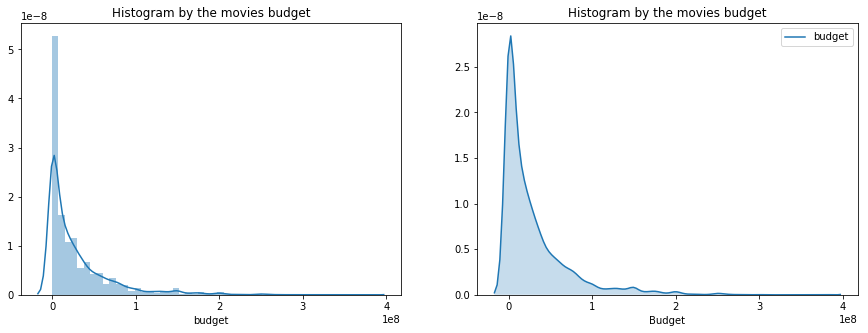

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

g = sns.distplot(Movies['budget'], kde=True, rug=False, ax=axes[0])
g.set(title='Histogram by the movies budget')

sns.kdeplot(Movies["budget"], shade=True)
plt.title("Histogram by the movies budget")
plt.xlabel("Budget")
plt.show()

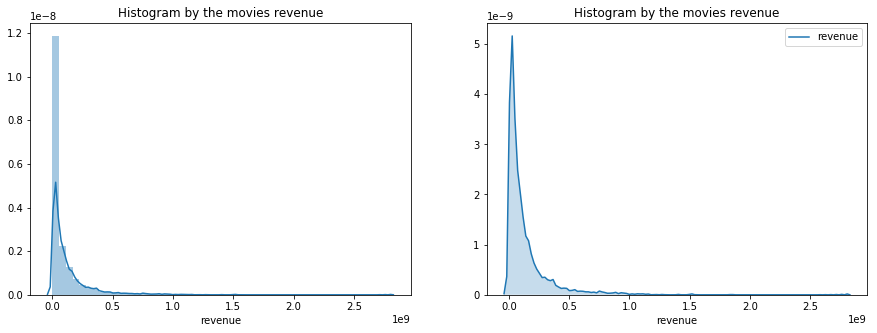

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

g = sns.distplot(Movies['revenue'], kde=True, rug=False, ax=axes[0])
g.set(title='Histogram by the movies revenue')

sns.kdeplot(Movies["revenue"], shade=True)
plt.title("Histogram by the movies revenue")
plt.xlabel("revenue")
plt.show()

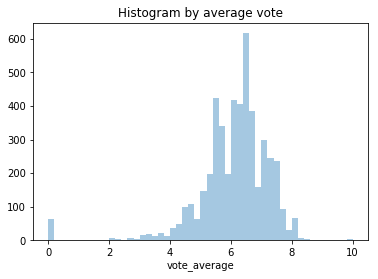

In [278]:
g = sns.distplot(Movies['vote_average'], kde=False, rug=False, )
g.set(title='Histogram by average vote')

In [265]:
keywords_dict = {}

for i in range(len(Movies)):
    if(len(Movies.iloc[i]["keywords"])>0):
        for j in range(len(Movies.iloc[i]["keywords"].split(","))):
            if (len(Movies.iloc[i]["keywords"].split(","))>0):
                keyword = Movies.iloc[i]["keywords"].split(",")[j]
                keywords_dict[keyword] = keywords_dict.get(keyword, 0) + 1

In [260]:
how_much_keywords = 10
most_freq_keywords = sorted(keywords_dict, key=keywords_dict.get)[-how_much_actors:]

print("Most {} frequent kewords: ".format(how_much_keywords))
for i in range(len(most_freq_keywords)):
    print(most_freq_keywords[len(most_freq_keywords)-1-i]+" has been keyword of {}".format(keywords_dict[most_freq_keywords[len(most_freq_keywords)-1-i]])+" different movies")

Most 10 frequent kewords: 
woman director has been keyword of 324 different movies
independent film has been keyword of 320 different movies
duringcreditsstinger has been keyword of 308 different movies
based on novel has been keyword of 198 different movies
murder has been keyword of 189 different movies
aftercreditsstinger has been keyword of 170 different movies
violence has been keyword of 150 different movies
dystopia has been keyword of 140 different movies
sport has been keyword of 126 different movies
revenge has been keyword of 118 different movies


In [248]:
actors_name_id_dict = {}
freq_actors_ids = {}

for i in range(len(Movies)):
    for j in range(len(Movies.iloc[i]["actors_id"].split(","))):
        if (len(Movies.iloc[i]["actors_id"].split(",")[j])>0):
            actor_id_int_key = int(Movies.iloc[i]["actors_id"].split(",")[j])
            freq_actors_ids[actor_id_int_key] = freq_actors_ids.get(actor_id_int_key, 0) + 1
            actors_name_id_dict[actor_id_int_key] = Movies.iloc[i]["actors"].split(",")[j]

In [249]:
how_much_actors = 10; 
most_freq_ids = sorted(freq_actors_ids, key=freq_actors_ids.get)[-how_much_actors:]
most_freq_actors = [actors_name_id_dict[key] for key in most_freq_ids]

print("Most {} frequent actors: ".format(how_much_actors))
for i in range(len(most_freq_actors)):
    print("{} has been in {} different movies".format(most_freq_actors[len(most_freq_actors)-i-1], freq_actors_ids[most_freq_ids[len(most_freq_actors)-i-1]]))

Most 10 frequent actors: 
Samuel L. Jackson has been in 67 different movies
Robert De Niro has been in 57 different movies
Bruce Willis has been in 51 different movies
Matt Damon has been in 48 different movies
Morgan Freeman has been in 46 different movies
Steve Buscemi has been in 43 different movies
Liam Neeson has been in 41 different movies
Owen Wilson has been in 40 different movies
Johnny Depp has been in 40 different movies
Alec Baldwin has been in 39 different movies


In [274]:
genres_dict = {}

for i in range(len(Movies)):
    if(len(Movies.iloc[i]["genres"])>0):
        for j in range(len(Movies.iloc[i]["genres"].split(","))):
            if (len(Movies.iloc[i]["genres"].split(","))>0):
                genre = Movies.iloc[i]["genres"].split(",")[j]
                genres_dict[genre] = genres_dict.get(genre, 0) + 1

In [275]:
how_much_genres = 10
most_freq_genres = sorted(genres_dict, key=genres_dict.get)[-how_much_genres:]

print("Most {} frequent genres: ".format(how_much_genres))
for i in range(len(most_freq_genres)):
    print(most_freq_genres[len(most_freq_genres)-1-i]+" is genre of {}".format(genres_dict[most_freq_genres[len(most_freq_genres)-1-i]])+" different movies")

Most 10 frequent genres: 
Drama is genre of 2300 different movies
Comedy is genre of 1723 different movies
Thriller is genre of 1275 different movies
Action is genre of 1156 different movies
Romance is genre of 895 different movies
Adventure is genre of 792 different movies
Crime is genre of 697 different movies
Science Fiction is genre of 538 different movies
Horror is genre of 520 different movies
Family is genre of 514 different movies
